### 0DB Analysis
This is a notebook for the analysis of data without attenuators collected on 23rd Jan 2025. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import os
from scipy.optimize import curve_fit
from scipy import stats

#setting formats
DARK=False
if(DARK==False):
    form='.k'
    plt.style.use(['default']) 
    fontcolor='k'
else:
    form='.w'
    plt.style.use(['dark_background'])
    fontcolor='w'


SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline

params = {
    'font.family': 'serif',
    'font.size' : 24, 'axes.titlesize' : 42, 'axes.labelsize' : 32, 'axes.linewidth' : 2,
    # ticks
    'xtick.labelsize' : 24, 'ytick.labelsize' : 24, 'xtick.major.size' : 18, 'xtick.minor.size' : 8,
    'ytick.major.size' : 18, 'ytick.minor.size' : 8, 'xtick.major.width' : 2, 'xtick.minor.width' : 2,
    'ytick.major.width' : 2, 'ytick.minor.width' : 2, 'xtick.direction' : 'in', 'ytick.direction' : 'in',
    # markers
    'lines.markersize' : 8, 'lines.markeredgewidth' : 2, 'errorbar.capsize' : 5, 'lines.linewidth' : 2,
    #'lines.linestyle' : None, 'lines.marker' : None,
    'savefig.bbox' : 'tight', 'legend.fontsize' : 24,
    'axes.labelsize': 30, 'axes.titlesize':24, 'xtick.labelsize':24, 'ytick.labelsize':24,
    'backend': 'Agg', 'mathtext.fontset': 'dejavuserif',
    'figure.facecolor':'w',
    #pad
    'axes.labelpad':20,
    # ticks
    'xtick.major.pad': 7,   'xtick.minor.pad': 7,   
    'ytick.major.pad': 4, 'ytick.minor.pad': 4,
}
plt.rcParams.update(params)

Import relavent data:

In [2]:
file_path = [
    './h5file/outnpy/lv2414_0DB_lv2415_0DB_combine_20250123_3p5v_1p75v_1p36v_0p68v_50us_50Hz_resistor_62p5M_run0_raw_b0_seg0_single_gussain_TimeConstant_scaled_R2ref.h5py',
    './h5file/outnpy/lv2414_0DB_lv2415_0DB_combine_20250125_3p5v_1p75v_1p36v_0p68v_50us_50Hz_resistor_62p5M_nody7_run0_raw_b0_seg0_single_gussain_TimeConstant_scaled_R2ref.h5py'
]

Let's get a quick look at the data.

In [15]:
df_test = pd.read_hdf(file_path[-1], key='winfo')
df_test

,Voltage,R2ref_anode,R2ref_anode_err,Delta_t
0,1.5,0.954836,0.016989,10
1,1.5,0.951947,0.017266,2
2,1.5,0.959170,0.016955,5
3,1.5,0.999028,0.017987,10000
4,1.5,1.000000,0.017946,1000
...,...,...,...,...
85,3.5,0.904995,0.016985,100
86,3.5,0.943762,0.017810,200
87,3.5,0.829104,0.015646,20
88,3.5,1.004145,0.018112,500


It is clear that a single .h5py file consists of all data from LED voltage $1.5\ {\rm V}$ to $3.5\ {\rm V}$. We need to apply some changes to our code:

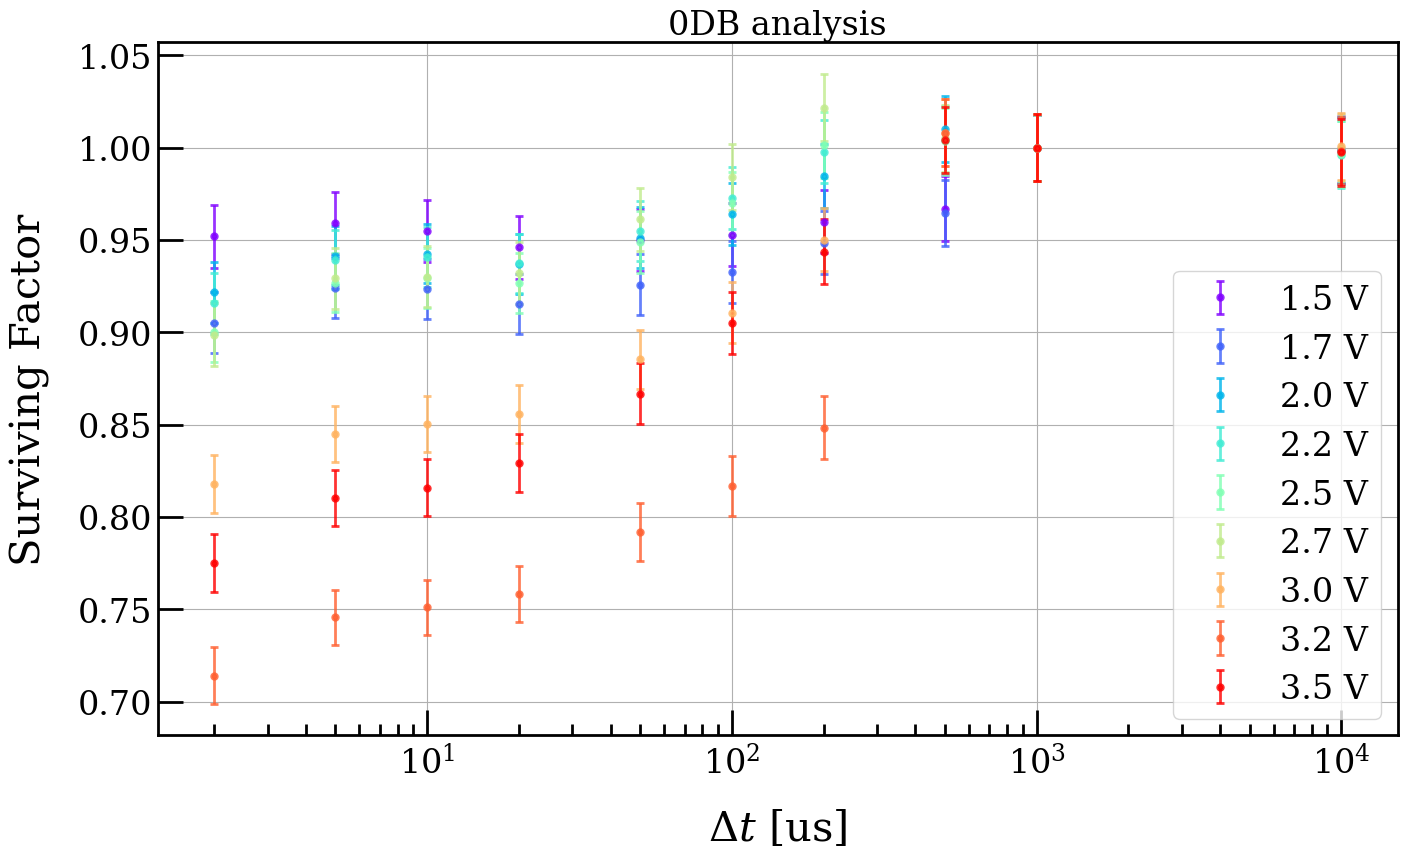

In [54]:
cmap = plt.cm.rainbow(np.linspace(0, 1, 9))
voltages = [1.5, 1.7, 2.0, 2.2, 2.5, 2.7, 3.0, 3.2, 3.5]

def plot_ratio(file):
    df = pd.read_hdf(file, key='winfo')
    for i in range(9):
        Delta_t_list = []
        for dt in np.array(df.Delta_t[df.Voltage == voltages[i]]):
            Delta_t_list.append(float(dt))
        ax.errorbar(Delta_t_list, df.R2ref_anode[df.Voltage == voltages[i]], color = cmap[i], yerr=df.R2ref_anode_err[df.Voltage == voltages[i]], fmt='.', alpha=0.8, markersize=8, capsize=3, elinewidth=2, capthick=2, label=r'{} V'.format(voltages[i])) 

fig, ax = plt.subplots(figsize=(16, 9))

file = file_path[-1]
plot_ratio(file)

ax.set_xscale('log')
ax.set_xlabel(r'$\Delta t$ [us]')
ax.set_ylabel(r'Surviving Factor')   
ax.set_title(r'0DB analysis')
#ax.set_ylim(0.9, 1.1)
ax.grid(True)
#ax.axhline(y=1.0, color='grey', linestyle='--', label='')
#ax.set_title('')
ax.legend(loc='lower right')
plt.show()
